In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Random Sampling

In [107]:
# pd.DataFrame.sample?

In [108]:
# pd.Series.sample?

In [109]:
uniforms = np.random.uniform(-3,3,5000)

# np.ndarray does NOT have hist() built in
# use plt.hist() or convert 

<AxesSubplot:>

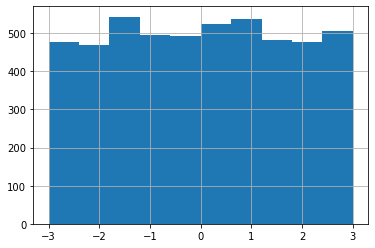

In [110]:
pd.Series(uniforms).hist()
# pd.Series.hist?

(array([476., 470., 543., 495., 492., 524., 536., 481., 477., 506.]),
 array([-2.99982143e+00, -2.39986548e+00, -1.79990952e+00, -1.19995357e+00,
        -5.99997611e-01, -4.16557537e-05,  5.99914299e-01,  1.19987025e+00,
         1.79982621e+00,  2.39978216e+00,  2.99973812e+00]),
 <BarContainer object of 10 artists>)

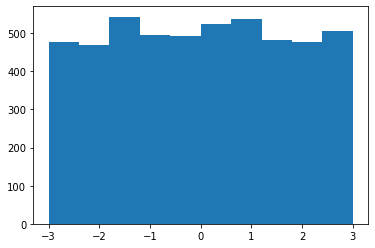

In [123]:
# plt.hist?
plt.hist(uniforms)

# Systematic Sampling

In [112]:
uniforms_series = pd.Series(uniforms)

# sample(frac:float) took a fraction(percentage) of the dataset, if set to 1, it effectively randomize the order of dataset
shuffled = uniforms_series.sample(frac=1)
display(shuffled)
shuffled.reset_index(drop=True)

3592   -2.126215
474    -0.290549
3766   -1.668205
2871   -1.272558
4130    2.365936
          ...   
1266    2.847836
2044    2.371033
667    -2.260516
2457   -1.311770
4842    1.939132
Length: 5000, dtype: float64

0      -2.126215
1      -0.290549
2      -1.668205
3      -1.272558
4       2.365936
          ...   
4995    2.847836
4996    2.371033
4997   -2.260516
4998   -1.311770
4999    1.939132
Length: 5000, dtype: float64

# Stratifaction
Segment/Group data before sampling

In [113]:
uniform_df = pd.DataFrame(uniforms_series, columns=['norm'])
uniform_df['index_group'] = np.array([np.full(1000, i) for i in range(5)]).flatten()
uniform_df = uniform_df[['index_group', 'norm']]
uniform_df

,index_group,norm
0,0,-2.013357
1,0,0.190227
2,0,1.686839
3,0,-0.182683
4,0,2.772832
...,...,...
4995,4,-1.741867
4996,4,2.624011
4997,4,0.517073
4998,4,0.881979


In [114]:
# Sampling 10% data from each group
uniform_df.groupby('index_group').sample(frac=0.1)

,index_group,norm
464,0,0.013545
41,0,-2.548951
189,0,0.991010
157,0,-1.882151
836,0,-1.476893
...,...,...
4103,4,1.966798
4963,4,-0.351037
4552,4,2.604141
4532,4,-0.057302


In [115]:
# Sampling 20 datapoints from each group
uniform_df.groupby('index_group').sample(n=20)

,index_group,norm
239,0,2.139845
789,0,1.608707
219,0,-0.843642
327,0,-1.751936
192,0,-0.085516
...,...,...
4709,4,1.633890
4391,4,2.799189
4814,4,-2.715974
4672,4,2.664932


In [116]:
# Weighted random sampling

# If index_group==1, assign weight to 1, otherwise 2
uniform_df['weight'] = np.where(uniform_df['index_group']==1, 1, 2)
display(uniform_df[::1000])

uniform_df.sample(frac=0.1, weights='weight').value_counts('index_group')

,index_group,norm,weight
0,0,-2.013357,2
1000,1,-2.277347,1
2000,2,-0.812200,2
3000,3,0.652076,2
4000,4,1.816857,2


index_group
0    114
3    113
2    104
4    104
1     65
dtype: int64

# Cluster Sampling
Randomly pick a few groups/segment and then random sampling

In [117]:
import random

# Randomly select subgroups
random_groups = random.sample(list(uniform_df['index_group'].unique()), k=2)
display(random_groups)

# Filter subgroups
uniform_filtered = uniform_df[uniform_df['index_group'].isin(random_groups)]
uniform_filtered['index_group'].unique()

# Random sampling from filtered subgroups
clustered_sample = uniform_filtered.groupby('index_group').sample(n=10)
clustered_sample

[0, 1]

,index_group,norm,weight
570,0,1.467053,2
474,0,-0.290549,2
146,0,-0.057011,2
27,0,1.085558,2
794,0,-1.934631,2
724,0,-1.679613,2
855,0,0.571626,2
1,0,0.190227,2
863,0,1.323101,2
421,0,0.678654,2


# Bootstrapping

Use a sample to build up a theoretical population

(array([ 12.,  44., 106., 166., 194., 205., 166.,  72.,  29.,   6.]),
 array([-0.05786277, -0.04364448, -0.0294262 , -0.01520791, -0.00098962,
         0.01322867,  0.02744696,  0.04166525,  0.05588354,  0.07010183,
         0.08432012]),
 <BarContainer object of 10 artists>)

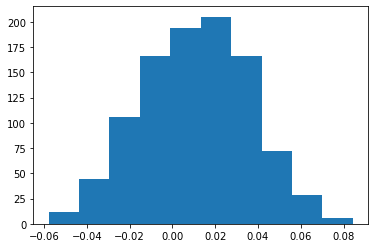

In [125]:
means = []
for i in range(1000):
    means.append(uniform_df.sample(frac=1, replace=True)['norm'].mean())
means[:5]

plt.hist(means)

Standard Error is the standard deviation of the statistics of interest with `ddof=1`
Standard Error * sqrt(sample_size) estimates the population standard deviation

# Confidence Interval

In [127]:
# Quantile Method:

lower = np.quantile(means, 0.025)
higher = np.quantile(means, 0.975)
print(lower, higher)

-0.037179136237392975 0.06140371084425521


In [128]:
# CDF
from scipy.stats import norm
lower = norm.ppf(0.025, np.mean(means), np.std(means))
higher = norm.ppf(0.975, np.mean(means), np.std(means))

print(lower, higher)

-0.038218963137213416 0.06048944179319413


In [131]:
norm.ppf?

Signature: norm.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    lower tail probability
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
x : array_like
    quantile corresponding to the lower tail probability q.
File:      /Applications/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method
